## Support Vector Machine Intro

In [19]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
import pickle



In [35]:
df = pd.read_csv('breast+cancer+wisconsin+original/breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop('id', axis=1,inplace=True)

x = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [41]:
model = SVC()
model.fit(x_train,y_train)

example_measure = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,3,2,2,3,2,1]])
example_measure = example_measure.reshape(len(example_measure),-1)

print(model.predict(example_measure))

accuracy = model.score(x_test,y_test)
print(accuracy)

[2 2]
0.6785714285714286


## Support Vector Machine 

Optimized a step!
Optimized a step!
Optimized a step!
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
-1.0


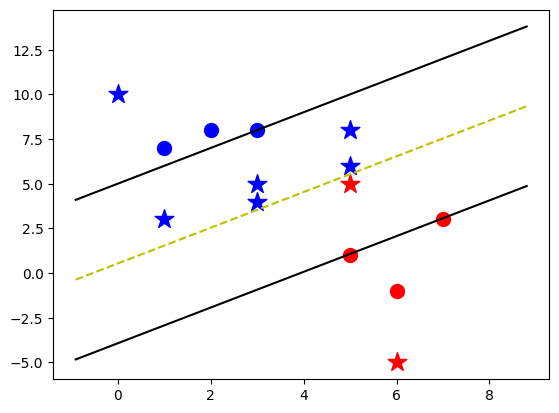

In [49]:
import matplotlib.pyplot as plt
import numpy as np

class support_vector_machine:
    def __init__(self, visulaization=True):
        self.visualization = visulaization
        self.color = {1:"r", -1:"b"}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            
    # train
    def fit(self, data): 
        self.data = data
        # {||w||: [W,b]}
        opt_dict = {}
        
        transforms = [[1,1],[-1,1],[1,-1],[-1,-1]]
        
        all_data= []
        for i in self.data:
            for features in self.data[i]:
                for feature in features:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value * 0.1, self.max_feature_value * 0.01, self.max_feature_value * 0.001]
        
        b_range_multiple = 5
        b_multiple = 5
        
        latest_optimum = self.max_feature_value * 10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            optimized = False
            
            while not optimized:
                for b in np.arange(-1*self.max_feature_value*b_range_multiple, self.max_feature_value*b_range_multiple,step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # yi (xi.w+b) >= 1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step!')
                else:
                    w = w - step
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            
            self.w = opt_choice[0]
            self.b = opt_choice[1]                    
            latest_optimum = opt_choice[0][0] + step*2        
        
    def predict(self, features):
        classification = np.sign(np.dot(np.array(features),self.w) + self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1],s=200, marker='*',c=self.color[classification])
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.color[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = x.w + b
        # v = x.w + b
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (w.x+b) = 1
        # positive support vector hyperlane
        psv1 = hyperplane(hyp_x_min,self.w,self.b,1)
        psv2 = hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],'k')
        
        # (w.x+b) = -1
        # negative support vector hyperlane
        nsv1 = hyperplane(hyp_x_min,self.w,self.b,-1)
        nsv2 = hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],'k')
        
        # (w.x+b) = 0
        # support vector hyperlane
        db1 = hyperplane(hyp_x_min,self.w,self.b,0)
        db2 = hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--') 
        
        plt.show()       


data_dict = {-1:np.array([[1,7],[2,8],[3,8]]), 1:np.array([[5,1],[6,-1],[7,3]])}

svm = support_vector_machine()
svm.fit(data=data_dict)

predict_us = [[0,10],[1,3],[3,4],[3,5],[5,5],[5,6],[6,-5],[5,8]]

for i in predict_us:
    print(svm.predict(i))


svm.visualize()
